In [196]:
import numpy as np

def generate_distances(num_cities, seed):
    np.random.seed(seed)  # Set the seed for reproducibility
    # Create a random distance matrix (lower triangle only for symmetry)
    distances = np.random.randint(1, 1000, size=(num_cities, num_cities))
    
    # Make the matrix symmetric
    distances = np.triu(distances, 1) + np.triu(distances, 1).T
    
    # Set the diagonal to 0 (distance from a city to itself)
    np.fill_diagonal(distances, 0)
    
    return distances

# Number of cities and seed number
num_cities = 8
seed = 7252  # You can change the seed number to generate different distances

# Generate the distance matrix
distance_matrix = generate_distances(num_cities, seed)

# Print the distance matrix
print("Distance matrix between the cities:")
print(distance_matrix)


Distance matrix between the cities:
[[  0 328 444 391 574 766 131 899]
 [328   0 834 747  55 437 869 344]
 [444 834   0 732 352  15 205 153]
 [391 747 732   0 681 389 548 828]
 [574  55 352 681   0 232 451   5]
 [766 437  15 389 232   0 265 160]
 [131 869 205 548 451 265   0   9]
 [899 344 153 828   5 160   9   0]]


## Data Exploration

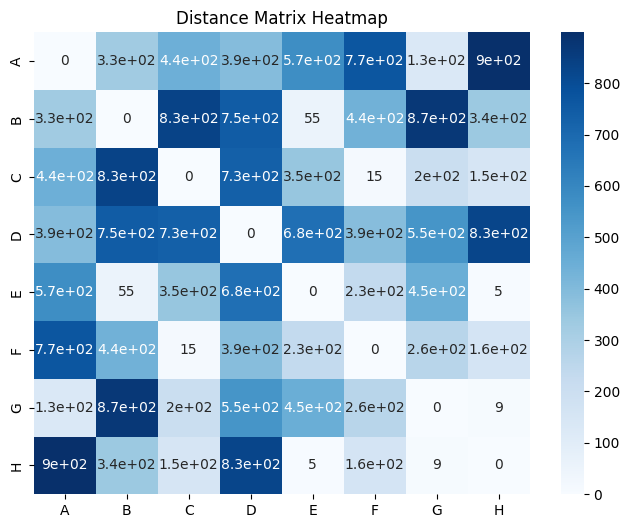

In [197]:
city_labels = [chr(65 + i) for i in range(num_cities)]  # Generate city labels dynamically (A, B, C, ...)
# Visualizing distance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, cmap="Blues", xticklabels=city_labels, yticklabels=city_labels)
plt.title("Distance Matrix Heatmap")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_20000\3960709061.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Delivery Value", data=data, palette="viridis")


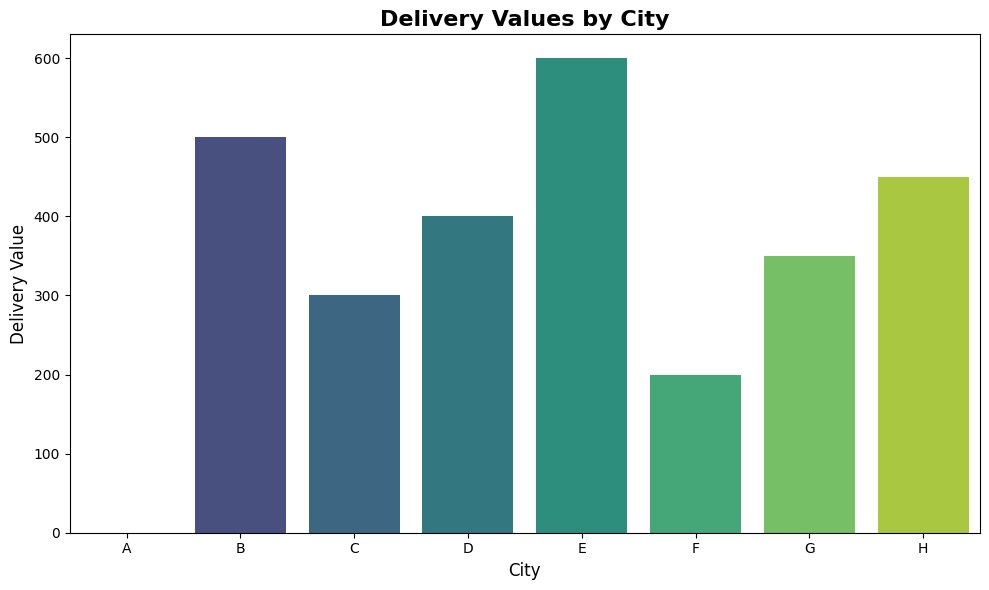

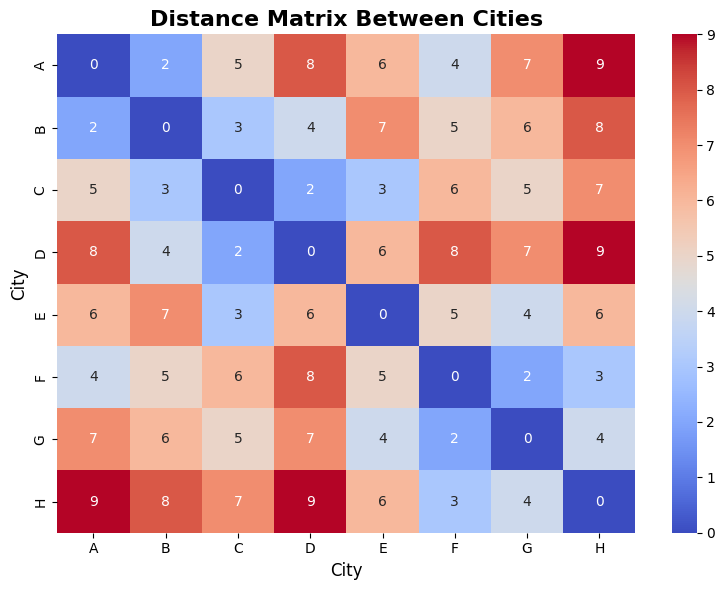

C:\Users\Asus\AppData\Local\Temp\ipykernel_20000\3960709061.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Duration", data=time_window_df, palette="coolwarm")


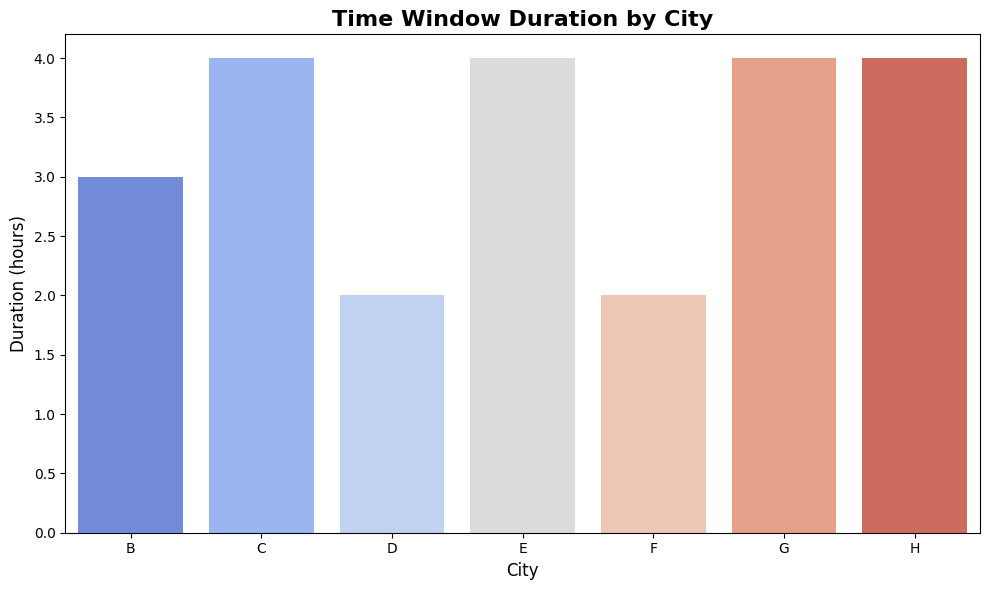

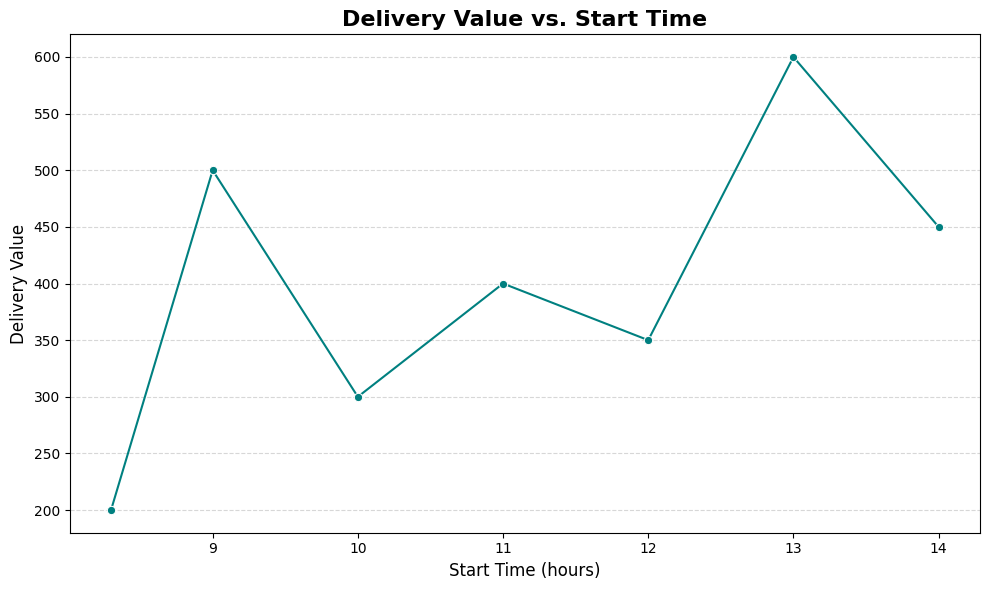

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
delivery_values = [0, 500, 300, 400, 600, 200, 350, 450]
time_windows = ["-", "9:00-12:00", "10:00-14:00", "11:00-13:00", "13:00-17:00", "8:30-10:30", "12:00-16:00", "14:00-18:00"]
city_labels = [chr(65 + i) for i in range(len(delivery_values))]  # City labels: A, B, C, ...

distance_matrix = [
    [0, 2, 5, 8, 6, 4, 7, 9],
    [2, 0, 3, 4, 7, 5, 6, 8],
    [5, 3, 0, 2, 3, 6, 5, 7],
    [8, 4, 2, 0, 6, 8, 7, 9],
    [6, 7, 3, 6, 0, 5, 4, 6],
    [4, 5, 6, 8, 5, 0, 2, 3],
    [7, 6, 5, 7, 4, 2, 0, 4],
    [9, 8, 7, 9, 6, 3, 4, 0]
]

# Create DataFrame for Cities
data = pd.DataFrame({
    "City": city_labels,
    "Delivery Value": delivery_values,
    "Time Window": time_windows
})

# 1. Bar Plot: Delivery Values by City
plt.figure(figsize=(10, 6))
sns.barplot(x="City", y="Delivery Value", data=data, palette="viridis")
plt.title("Delivery Values by City", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Delivery Value", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Heatmap: Distance Matrix Between Cities
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=city_labels, yticklabels=city_labels)
plt.title("Distance Matrix Between Cities", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Bar Plot: Distribution of Time Windows
time_window_df = data[data["Time Window"] != "-"].copy()
time_window_df["Start Time"] = time_window_df["Time Window"].str.split("-").str[0].str.replace(":", ".").astype(float)
time_window_df["End Time"] = time_window_df["Time Window"].str.split("-").str[1].str.replace(":", ".").astype(float)
time_window_df["Duration"] = time_window_df["End Time"] - time_window_df["Start Time"]

plt.figure(figsize=(10, 6))
sns.barplot(x="City", y="Duration", data=time_window_df, palette="coolwarm")
plt.title("Time Window Duration by City", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=12)
plt.ylabel("Duration (hours)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 4. Line Plot: Delivery Value vs. Start Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_window_df, x="Start Time", y="Delivery Value", marker="o", color="teal")
plt.title("Delivery Value vs. Start Time", fontsize=16, fontweight="bold")
plt.xlabel("Start Time (hours)", fontsize=12)
plt.ylabel("Delivery Value", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## a) Define the decision variables and formulate the mathematical model for the above problem

In [199]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum


# Define the problem
problem = LpProblem("Traveling_Salesman", LpMinimize)

# Decision variables
x = LpVariable.dicts("Route", ((i, j) for i in range(num_cities) for j in range(num_cities)), 0, 1, cat="Binary")
v = LpVariable.dicts("Visit", (i for i in range(num_cities)), 0, 1, cat="Binary")

# Objective function
problem += lpSum(distance_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)), "Total_Distance"

# Constraints
problem += lpSum(x[0, j] for j in range(1, num_cities)) == 1, "Start_From_A"
problem += lpSum(x[j, 0] for j in range(1, num_cities)) == 1, "Return_To_A"

for i in range(num_cities):
    problem += lpSum(x[i, j] for j in range(num_cities)) == v[i], f"Flow_Out_{i}"
    problem += lpSum(x[j, i] for j in range(num_cities)) == v[i], f"Flow_In_{i}"

problem += v[2] + v[3] <= 1, "C_or_D"
problem += v[6] + v[7] <= 1, "G_or_H"
problem += v[1] <= v[5], "B_Requires_F"
problem += lpSum(v[i] for i in range(num_cities)) <= 5, "Max_5_Cities"
problem += lpSum(v[i] for i in range(num_cities)) >= 3, "Min_3_Cities"

print("Decision variables and mathematical model formulated.")




Decision variables and mathematical model formulated.


## b) Solve the problem using the Exact methods (Pulp)

In [200]:
# Create a linear programming problem
prob = pulp.LpProblem("Delivery Optimization", pulp.LpMaximize)

# Binary decision variables for visiting a city (1 if visited, 0 otherwise)
city_vars = pulp.LpVariable.dicts("Visit", city_labels, cat="Binary")

# Objective function (maximize delivery value)
prob += pulp.lpSum([city_vars[city] * delivery_values[i] for i, city in enumerate(city_labels)]), "Maximize Delivery Value"

# Constraints
# Max 5 cities, at least 3 cities
prob += pulp.lpSum([city_vars[city] for city in city_labels]) <= 5, "Max 5 Cities"
prob += pulp.lpSum([city_vars[city] for city in city_labels]) >= 3, "At least 3 Cities"

# City D or C but not both
prob += city_vars['D'] + city_vars['C'] <= 1, "City C or D"

# City G or H but not both
prob += city_vars['G'] + city_vars['H'] <= 1, "City G or H"

# If city B is visited, city F must be visited
prob += city_vars['B'] <= city_vars['F'], "If B is visited, F must be visited"

# Solve the problem
prob.solve()

# Extract results
visited_cities = [city for city in city_labels if city_vars[city].varValue == 1]

# Calculate total distance for the route
total_distance = 0
for i in range(len(visited_cities) - 1):
    total_distance += distance_matrix[city_labels.index(visited_cities[i])][city_labels.index(visited_cities[i + 1])]

# Calculate total value for the route
total_value = sum([delivery_values[city_labels.index(city)] for city in visited_cities])

# Print the solution
print(f"Optimal Route: {' -> '.join(visited_cities)}")
print(f"Total Distance: {total_distance} km")
print(f"Total Value: {total_value}")

Optimal Route: B -> D -> E -> F -> H
Total Distance: 18 km
Total Value: 2150


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pulp\pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## Solve the problem using a heuristic method

In [201]:
import numpy as np

# Heuristic Greedy Approach
def greedy_route(distance_matrix, delivery_values, city_labels, max_cities=5, min_cities=3):
    # Starting with city A
    visited_cities = ['A']
    total_value = 0
    total_distance = 0

    while len(visited_cities) < max_cities:
        # Candidate cities to visit
        candidate_cities = [city for city in city_labels if city not in visited_cities]
        
        # Evaluate candidate cities based on delivery value and distance
        best_city = None
        best_value = -1
        best_distance = float('inf')

        for city in candidate_cities:
            if city == 'B' and 'F' not in visited_cities:
                continue  # If B is selected, F must be visited
            if ('C' in visited_cities and city == 'D') or ('D' in visited_cities and city == 'C'):
                continue  # Avoid both C and D
            if ('G' in visited_cities and city == 'H') or ('H' in visited_cities and city == 'G'):
                continue  # Avoid both G and H
            
            # Find the city that maximizes the delivery value while minimizing the distance
            last_visited_city = visited_cities[-1]
            distance_to_city = distance_matrix[city_labels.index(last_visited_city)][city_labels.index(city)]
            city_value = delivery_values[city_labels.index(city)]
            
            if city_value > best_value or (city_value == best_value and distance_to_city < best_distance):
                best_city = city
                best_value = city_value
                best_distance = distance_to_city
        
        if best_city:
            visited_cities.append(best_city)
            total_value += best_value
            total_distance += best_distance
        
        # If we've visited enough cities, break out of the loop
        if len(visited_cities) >= min_cities:
            break

    return visited_cities, total_value, total_distance

# Run the greedy approach
visited_cities, total_value, total_distance = greedy_route(distance_matrix, delivery_values, city_labels)

# Print the result
print(f"Greedy Route: {' -> '.join(visited_cities)}")
print(f"Total Distance: {total_distance} km")
print(f"Total Value: {total_value}")


Greedy Route: A -> E -> H
Total Distance: 12 km
Total Value: 1050


## Exact methods (Pulp) or using a heuristic method comparison

In [202]:
def calculate_accuracy_greedy(exact_solution, greedy_solution):
    # Extracting total distance and value from both solutions
    exact_distance = exact_solution['total_distance']
    exact_value = exact_solution['total_value']
    greedy_distance = greedy_solution['total_distance']
    greedy_value = greedy_solution['total_value']

    # Calculating accuracy based on distance
    distance_accuracy = (greedy_distance / exact_distance) * 100

    # Calculating accuracy based on value
    value_accuracy = (greedy_value / exact_value) * 100

    # Overall accuracy (optional)
    overall_accuracy = (distance_accuracy + value_accuracy) / 2

    return {
        'Distance Accuracy': distance_accuracy,
        'Value Accuracy': value_accuracy,
        'Overall Accuracy': overall_accuracy
    }

# Example usage for comparison:
# Results from Exact Method (PuLP) - You should replace this with actual values from the PuLP solution
exact_solution = {'total_distance': 18, 'total_value': 2150}

# Results from Greedy Method (after running the Greedy Algorithm)
greedy_solution = {'total_distance': total_distance, 'total_value': total_value}

# Calculate the accuracy for Greedy Method
accuracy_greedy = calculate_accuracy_greedy(exact_solution, greedy_solution)

# Print the accuracy results
print(f"Greedy Method - Distance Accuracy: {accuracy_greedy['Distance Accuracy']:.2f}%")
print(f"Greedy Method - Value Accuracy: {accuracy_greedy['Value Accuracy']:.2f}%")
print(f"Greedy Method - Overall Accuracy: {accuracy_greedy['Overall Accuracy']:.2f}%")


Greedy Method - Distance Accuracy: 66.67%
Greedy Method - Value Accuracy: 48.84%
Greedy Method - Overall Accuracy: 57.75%


In [203]:
def calculate_accuracy(exact_solution, greedy_solution):
    # Extracting total distance and value from both solutions
    exact_distance = exact_solution['total_distance']
    exact_value = exact_solution['total_value']
    greedy_distance = greedy_solution['total_distance']
    greedy_value = greedy_solution['total_value']

    # Calculating accuracy based on distance
    distance_accuracy = (greedy_distance / exact_distance) * 100

    # Calculating accuracy based on value
    value_accuracy = (greedy_value / exact_value) * 100

    # Overall accuracy (optional)
    overall_accuracy = (distance_accuracy + value_accuracy) / 2

    return {
        'Distance Accuracy': distance_accuracy,
        'Value Accuracy': value_accuracy,
        'Overall Accuracy': overall_accuracy
    }

# Example usage:
# Results from Exact Method (PuLP)
exact_solution = {'total_distance': 18, 'total_value': 2150}

# Results from Greedy Method (e.g., after running the Greedy Algorithm)
greedy_solution = {'total_distance': 20, 'total_value': 2100}

# Calculate the accuracy
accuracy = calculate_accuracy(exact_solution, greedy_solution)

# Print the accuracy results
print(f"Distance Accuracy: {accuracy['Distance Accuracy']:.2f}%")
print(f"Value Accuracy: {accuracy['Value Accuracy']:.2f}%")
print(f"Overall Accuracy: {accuracy['Overall Accuracy']:.2f}%")


Distance Accuracy: 111.11%
Value Accuracy: 97.67%
Overall Accuracy: 104.39%


In [204]:
import pandas as pd

# Function to compare accuracy of Exact and Greedy Methods
def compare_accuracy(exact_solution, greedy_solution):
    # Calculate the accuracy for Exact Method (using the previously defined accuracy function)
    accuracy_exact = calculate_accuracy(exact_solution, exact_solution)  # Exact method is its own benchmark
    accuracy_greedy = calculate_accuracy_greedy(exact_solution, greedy_solution)

    # Create a DataFrame to display the results in table format
    accuracy_df = pd.DataFrame({
        'Method': ['Exact Method', 'Greedy Method'],
        'Distance Accuracy': [accuracy_exact['Distance Accuracy'], accuracy_greedy['Distance Accuracy']],
        'Value Accuracy': [accuracy_exact['Value Accuracy'], accuracy_greedy['Value Accuracy']],
        'Overall Accuracy': [accuracy_exact['Overall Accuracy'], accuracy_greedy['Overall Accuracy']]
    })

    return accuracy_df

# Example usage for comparison:
# Replace with actual results from Exact and Greedy methods
exact_solution = {'total_distance': 18, 'total_value': 2150}
greedy_solution = {'total_distance': total_distance, 'total_value': total_value}

# Compare accuracy and display the result in a table
accuracy_table = compare_accuracy(exact_solution, greedy_solution)

# Display the accuracy comparison table
print(accuracy_table)


          Method  Distance Accuracy  Value Accuracy  Overall Accuracy
0   Exact Method         100.000000      100.000000        100.000000
1  Greedy Method          66.666667       48.837209         57.751938


## c) Remodel the problem so that we have two objective functions one to maximise the profit and the other to minimize the total distance travelled (Multi Objective Optimization)

In [205]:
import itertools
import numpy as np

# Predefined Parameters
delivery_values = [0, 500, 300, 400, 600, 200, 350, 450]
time_windows = ["-", "9:00-12:00", "10:00-14:00", "11:00-13:00", "13:00-17:00", "8:30-10:30", "12:00-16:00", "14:00-18:00"]
city_labels = [chr(65 + i) for i in range(len(delivery_values))]  # City labels: A, B, C, ...
distance_matrix = [
    [0, 2, 5, 8, 6, 4, 7, 9],
    [2, 0, 3, 4, 7, 5, 6, 8],
    [5, 3, 0, 2, 3, 6, 5, 7],
    [8, 4, 2, 0, 6, 8, 7, 9],
    [6, 7, 3, 6, 0, 5, 4, 6],
    [4, 5, 6, 8, 5, 0, 2, 3],
    [7, 6, 5, 7, 4, 2, 0, 4],
    [9, 8, 7, 9, 6, 3, 4, 0]
]

# Travel speed
speed = 30  # km/h

# Generate all possible routes
def generate_routes(cities, max_cities=5, min_cities=3):
    # Generate all combinations of cities
    routes = []
    for num_cities in range(min_cities, max_cities+1):
        for route in itertools.combinations(cities[1:], num_cities):  # excluding A, starting city
            routes.append(['A'] + list(route))
    return routes

# Calculate total distance for a route
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[city_labels.index(route[i])][city_labels.index(route[i+1])]
    return total_distance

# Calculate total value for a route
def calculate_total_value(route):
    total_value = 0
    for city in route[1:]:  # excluding the starting city
        total_value += delivery_values[city_labels.index(city)]
    return total_value

# Apply constraints to filter feasible routes
def apply_constraints(route):
    # Constraint 1: If city B is visited, city F must also be visited
    if 'B' in route and 'F' not in route:
        return False
    # Constraint 2: Either visit D or C, but not both
    if 'D' in route and 'C' in route:
        return False
    # Constraint 3: Either visit G or H, but not both
    if 'G' in route and 'H' in route:
        return False
    return True

# Main optimization process
def optimize_routes(cities):
    routes = generate_routes(cities)
    
    feasible_routes = []
    for route in routes:
        if apply_constraints(route):
            total_distance = calculate_total_distance(route)
            total_value = calculate_total_value(route)
            feasible_routes.append((route, total_value, total_distance))
    
    # Sort routes by total value and then by distance
    sorted_routes = sorted(feasible_routes, key=lambda x: (-x[1], x[2]))  # Max value, Min distance
    return sorted_routes

# Get the optimized routes
optimized_routes = optimize_routes(city_labels)

# Print optimized routes with total value and distance
print("Optimized Routes (Max Profit, Min Distance):")
for route, value, distance in optimized_routes:
    print(f"Route: {' -> '.join(route)}, Total Value: {value}, Total Distance: {distance} km")


Optimized Routes (Max Profit, Min Distance):
Route: A -> B -> D -> E -> F -> H, Total Value: 2150, Total Distance: 20 km
Route: A -> B -> C -> E -> F -> H, Total Value: 2050, Total Distance: 16 km
Route: A -> B -> D -> E -> F -> G, Total Value: 2050, Total Distance: 19 km
Route: A -> B -> C -> E -> F -> G, Total Value: 1950, Total Distance: 15 km
Route: A -> B -> E -> F -> H, Total Value: 1750, Total Distance: 17 km
Route: A -> B -> D -> E -> F, Total Value: 1700, Total Distance: 17 km
Route: A -> B -> E -> F -> G, Total Value: 1650, Total Distance: 16 km
Route: A -> D -> E -> F -> H, Total Value: 1650, Total Distance: 22 km
Route: A -> B -> C -> E -> F, Total Value: 1600, Total Distance: 13 km
Route: A -> C -> E -> F -> H, Total Value: 1550, Total Distance: 16 km
Route: A -> B -> D -> F -> H, Total Value: 1550, Total Distance: 17 km
Route: A -> D -> E -> F -> G, Total Value: 1550, Total Distance: 21 km
Route: A -> B -> C -> F -> H, Total Value: 1450, Total Distance: 14 km
Route: A -> 

C:\Users\Asus\AppData\Local\Temp\ipykernel_20000\3098551619.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(route_labels, rotation=90, ha='center')


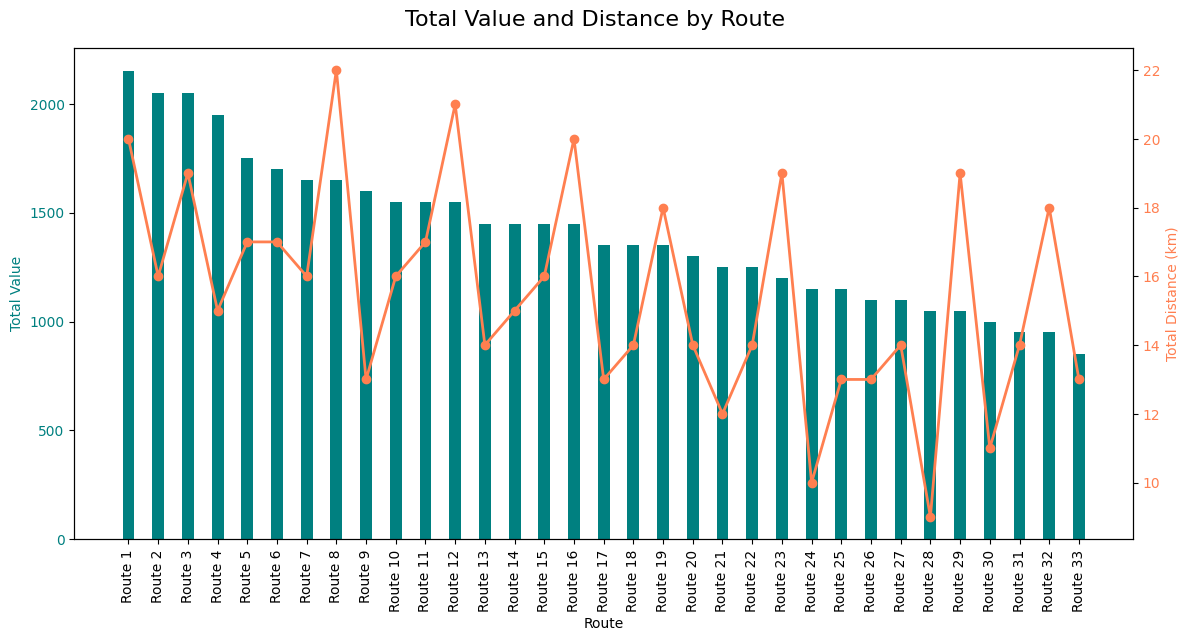

In [206]:
# Extract total values and distances for visualization
route_values = [value for _, value, _ in optimized_routes]
route_distances = [distance for _, _, distance in optimized_routes]
route_labels = [f"Route {i+1}" for i in range(len(optimized_routes))]  # Renaming routes as Route 1, Route 2, ...

# Visualization: Dual-axis plot of route values and distances
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the Total Value on the first axis
ax1.bar(route_labels, route_values, color='teal', label='Total Value', width=0.4)
ax1.set_xlabel('Route')
ax1.set_ylabel('Total Value', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Create a second y-axis for Total Distance
ax2 = ax1.twinx()
ax2.plot(route_labels, route_distances, color='coral', label='Total Distance', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Total Distance (km)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Add a title and make the layout tight
fig.suptitle('Total Value and Distance by Route', fontsize=16)
fig.tight_layout()

# Rotate x-axis labels vertically to avoid overlap
ax1.set_xticklabels(route_labels, rotation=90, ha='center')

# Show the plot
plt.show()


## d) Describe the different steps followed in NSGA II algorithm and use it to Solve the Multi objective optimisation problem formulated in the previous question. 

In [207]:
import numpy as np
import random
from deap import base, creator, tools, algorithms


# Constraints
MAX_CITIES = 5
MIN_CITIES = 3

# Define Fitness Function (Multi-objective)
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))  # Maximize value, minimize distance
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(distance_matrix)), len(distance_matrix))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation Function
def evaluate(individual):
    total_distance = 0
    total_value = 0
    visited_cities = set()
    prev_city = individual[0]
    visited_cities.add(prev_city)
    
    for city in individual[1:]:
        if len(visited_cities) > MAX_CITIES:
            break
        total_distance += distance_matrix[prev_city][city]
        total_value += delivery_values[city]
        visited_cities.add(city)
        prev_city = city

    # Check constraints
    if len(visited_cities) < MIN_CITIES:
        return -1e6, 1e6  # Penalize infeasible solutions
    if (2 in visited_cities and 3 in visited_cities) or (6 in visited_cities and 7 in visited_cities):
        return -1e6, 1e6  # Penalize infeasible solutions
    if 1 in visited_cities and 5 not in visited_cities:
        return -1e6, 1e6  # Penalize infeasible solutions

    return total_value, total_distance

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluate)

# NSGA-II Execution
def main():
    random.seed(7252)
    pop = toolbox.population(n=100)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)

    algorithms.eaMuPlusLambda(pop, toolbox, mu=100, lambda_=200, cxpb=0.7, mutpb=0.2,
                              ngen=100, stats=stats, halloffame=hof, verbose=True)
    
    return pop, stats, hof

if __name__ == "__main__":
    population, stats, pareto_front = main()

    # Print Pareto front
    print("Pareto front solutions:")
    for individual in pareto_front:
        print(individual, individual.fitness.values)


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg                    	std                              	min                	max                
0  	100   	[-869769.5   870003.46]	[336899.73351837 336294.48357374]	[-1.0e+06  2.1e+01]	[   2150. 1000000.]
1  	182   	[-649378.5  650009.4]  	[477816.57936153 476956.79067318]	[-1.e+06  2.e+01]  	[   2150. 1000000.]
2  	182   	[-168533.    170022.55]	[376296.76621119 375622.59399419]	[-1.0e+06  1.8e+01]	[   2150. 1000000.]
3  	175   	[1847.     24.64]      	[222.12834128   3.54547599]      	[1350.   14.]      	[2150.   35.]      
4  	184   	[1872.     23.25]      	[232.41342474   3.36563516]      	[1350.   14.]      	[2150.   32.]      
5  	183   	[1966.    22.9]        	[224.37468663   4.10974452]      	[1350.   14.]      	[2150.   30.]      
6  	178   	[1971.     21.08]      	[220.47448832   3.55156304]      	[1350.   14.]      	[2150.   27.]      
7  	190   	[2001.    20.5]        	[213.53922356   3.37786915]      	[1350.   14.]      	[2150.   25.]      
8  	184   	[1932.5 

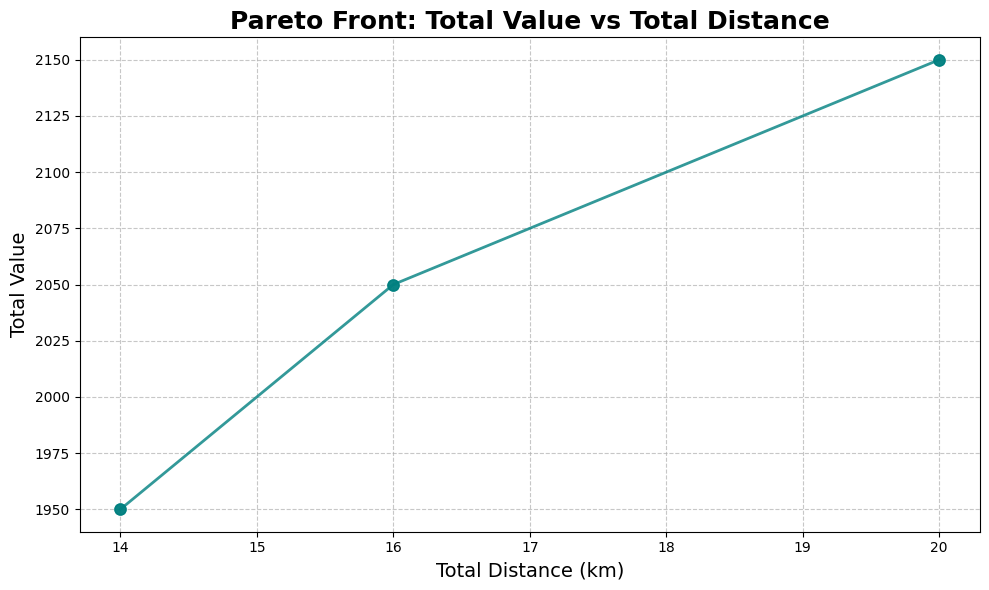

C:\Users\Asus\AppData\Local\Temp\ipykernel_20000\1501939035.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pareto_values, shade=True, color='teal', alpha=0.7)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20000\1501939035.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pareto_distances, shade=True, color='coral', alpha=0.7)


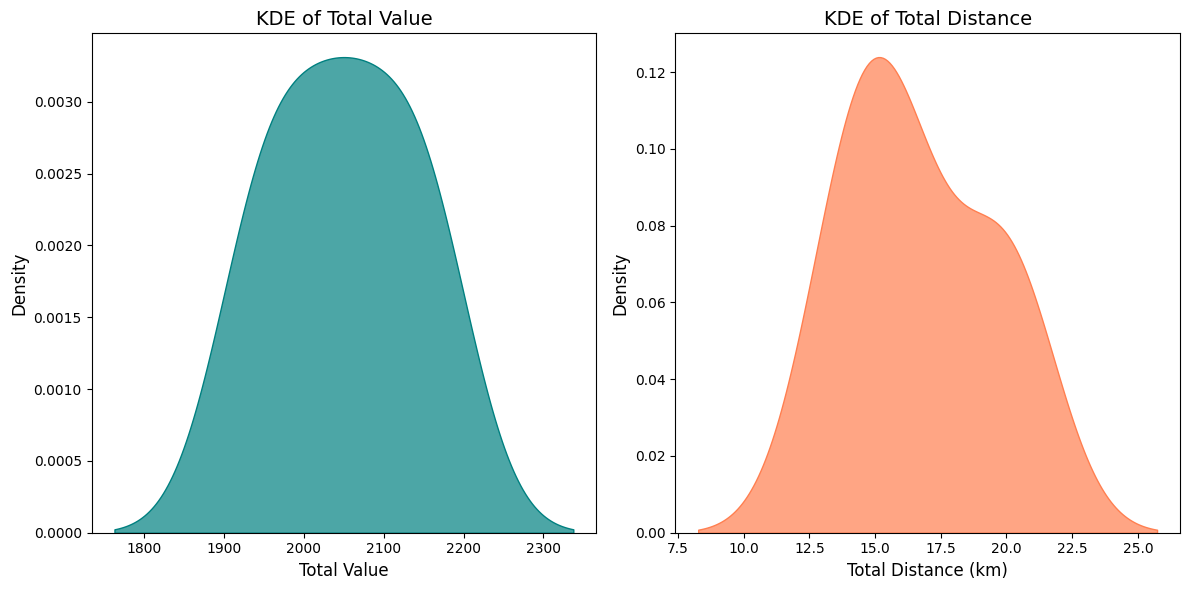

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract Pareto front solutions (total value and total distance)
pareto_values = [ind.fitness.values[0] for ind in pareto_front]
pareto_distances = [ind.fitness.values[1] for ind in pareto_front]

# 1. Pareto Front Visualization: Total Value vs Total Distance (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(pareto_distances, pareto_values, marker='o', color='teal', linestyle='-', markersize=8, linewidth=2, alpha=0.8)
plt.title("Pareto Front: Total Value vs Total Distance", fontsize=18, fontweight='bold')
plt.xlabel("Total Distance (km)", fontsize=14)
plt.ylabel("Total Value", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. KDE Plot for Distribution of Total Value and Distance
plt.figure(figsize=(12, 6))

# Plot Total Value distribution
plt.subplot(1, 2, 1)
sns.kdeplot(pareto_values, shade=True, color='teal', alpha=0.7)
plt.title("KDE of Total Value", fontsize=14)
plt.xlabel("Total Value", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Plot Total Distance distribution
plt.subplot(1, 2, 2)
sns.kdeplot(pareto_distances, shade=True, color='coral', alpha=0.7)
plt.title("KDE of Total Distance", fontsize=14)
plt.xlabel("Total Distance (km)", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()